In [2]:
!pip install wordcloud

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import csv

In [57]:
stopwords = set(STOPWORDS)

Importamos csv con las palabras de las reviews y sus frecuencias

In [55]:
df = pd.read_csv("freqPalabrasPos,csv", on_bad_lines='skip',index_col=0)
df['count'] =pd.to_numeric(df['count'], errors='coerce')
df['count'] = df['count'].fillna(0).astype(int)
df

,count
word,
still,535570
hope,82832
those,185845
spoil,10201
some,749966
...,...
Stratis.,28
2009\nDonut,11
FATEs,25


Convertimos el dataframe en un diccionario y filtramos las palabras que salen en la lista de las stopwords de la libreria wordcloud

In [65]:
dpos = df.to_dict()
new_data = {k: v for k, v in dpos.get('count').items() if k not in stopwords}

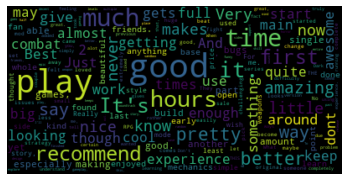

In [66]:
#generamos la wordcloud
wc = WordCloud(max_font_size=40)
wc.generate_from_frequencies(new_data)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('graficos/wordcloudPos.png')

Repetimos para las reviews negativas

In [69]:
df = pd.read_csv("freqPalabrasNeg.csv", on_bad_lines='skip',index_col=0)
df['count'] =pd.to_numeric(df['count'], errors='coerce')
df['count'] = df['count'].fillna(0).astype(int)
dneg = df.to_dict()
new_data = {k: v for k, v in dneg.get('count').items() if k not in stopwords}

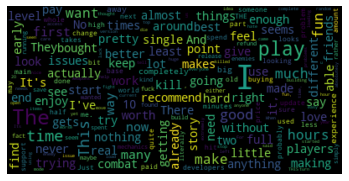

In [71]:
#generamos la wordcloud
wc = WordCloud(max_font_size=40)
wc.generate_from_frequencies(new_data)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('graficos/wordcloudNeg.png')